In [1]:
from itertools import permutations
from scipy.stats import kendalltau
import numpy as np

# Define main rank ordering
main_rank_ordering = ['A', 'B', 'C', 'D']

# Generate all permutations
all_permutations = list(permutations(main_rank_ordering))

# Calculate Kendall-tau distances
kendall_distances = [kendalltau(main_rank_ordering, perm).correlation for perm in all_permutations]

# Convert Kendall-tau distances to array
kendall_distances = np.array(kendall_distances)

# Print some results
kendall_distances[:5], all_permutations[:5]

(array([1.        , 0.66666667, 0.66666667, 0.33333333, 0.33333333]),
 [('A', 'B', 'C', 'D'),
  ('A', 'B', 'D', 'C'),
  ('A', 'C', 'B', 'D'),
  ('A', 'C', 'D', 'B'),
  ('A', 'D', 'B', 'C')])

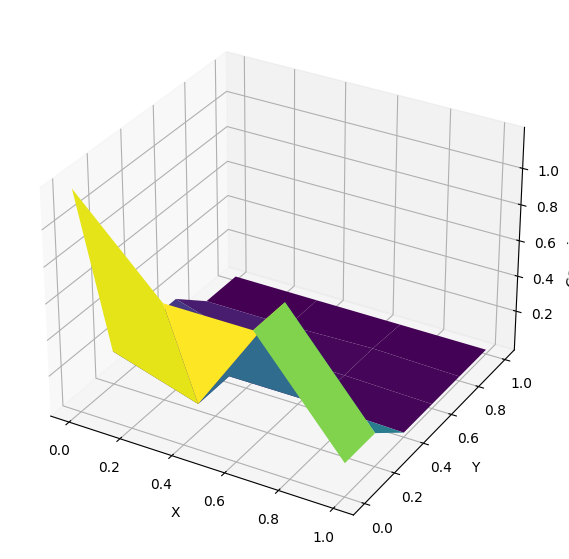

In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of permutations
num_permutations = len(all_permutations)

# Arrange Kendall-tau distances in a 2D grid
kendall_grid = kendall_distances.reshape(6, 4)

# Generate 2D coordinates
x = np.linspace(0, 1, 4)
y = np.linspace(0, 1, 6)
x, y = np.meshgrid(x, y)

# Calculate Gaussian values
z = norm.pdf(kendall_grid, loc=1, scale=1/3)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Gaussian Value')

plt.show()